In [1]:
# More imports
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_history(history, title=None, validation=True):
  fig = plt.figure(figsize=(40,10))
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'], label='loss')
  if validation:
    plt.plot(history.history['val_loss'], label='val_loss')
  plt.title('Loss by epoch')
  plt.legend();

  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'], label='accuracy')
  if validation:
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.title('Accuracy by epoch')
  plt.legend();

  if title != None:
    fig.suptitle(title, fontsize=16)
  plt.show()

In [3]:
### build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # short distance
#   y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [4]:
def generate_label(X, i1, i2, i3):
  Y = np.zeros(X.shape[0])
  filter1 = (X[:,i1] < 0) & (X[:,i2] < 0) & (X[:,i3] < 0)
  filter2 = (X[:,i1] < 0) & (X[:,i2] > 0) & (X[:,i3] > 0)
  filter3 = (X[:,i1] > 0) & (X[:,i2] < 0) & (X[:,i3] > 0)
  filter4 = (X[:,i1] > 0) & (X[:,i2] > 0) & (X[:,i3] < 0)
  Y[filter1] = 1
  Y[filter2] = 1
  Y[filter3] = 1
  Y[filter4] = 1
  return Y

In [5]:
Y_short_memory = generate_label(X, -1, -2, -3)
Y_long_memory = generate_label(X, 0, 1, 2)

In [6]:
def perform_modeling(i_layer, x_layer, X, Y_short, Y_long, epochs, learning_rate):
  print('Short memory model')
  model1 = Model(i_layer,x_layer)
  model1.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
  history_short = model1.fit(X, Y_short, epochs=epochs, validation_split=0.5)

  print('Long memory model')
  model2 = Model(i_layer,x_layer)
  model2.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
  history_long = model2.fit(X, Y_long, epochs=epochs, validation_split=0.5)

  print(model2.summary())

  plot_history(history_short, title="Short term memory")
  plot_history(history_long, title="Long term memory")

Short memory model
Epoch 1/100
79/79 [==============================] - 1s 5ms/step - loss: 0.7473 - accuracy: 0.4944 - val_loss: 0.6997 - val_accuracy: 0.5164
Epoch 2/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.5092 - val_loss: 0.6985 - val_accuracy: 0.4828
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5072 - val_loss: 0.6997 - val_accuracy: 0.4812
Epoch 4/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.5316 - val_loss: 0.7016 - val_accuracy: 0.4732
Epoch 5/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5188 - val_loss: 0.7004 - val_accuracy: 0.4796
Epoch 6/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5120 - val_loss: 0.6968 - val_accuracy: 0.4864
Epoch 7/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5128 - val_loss: 0.6987 - val_accuracy: 0

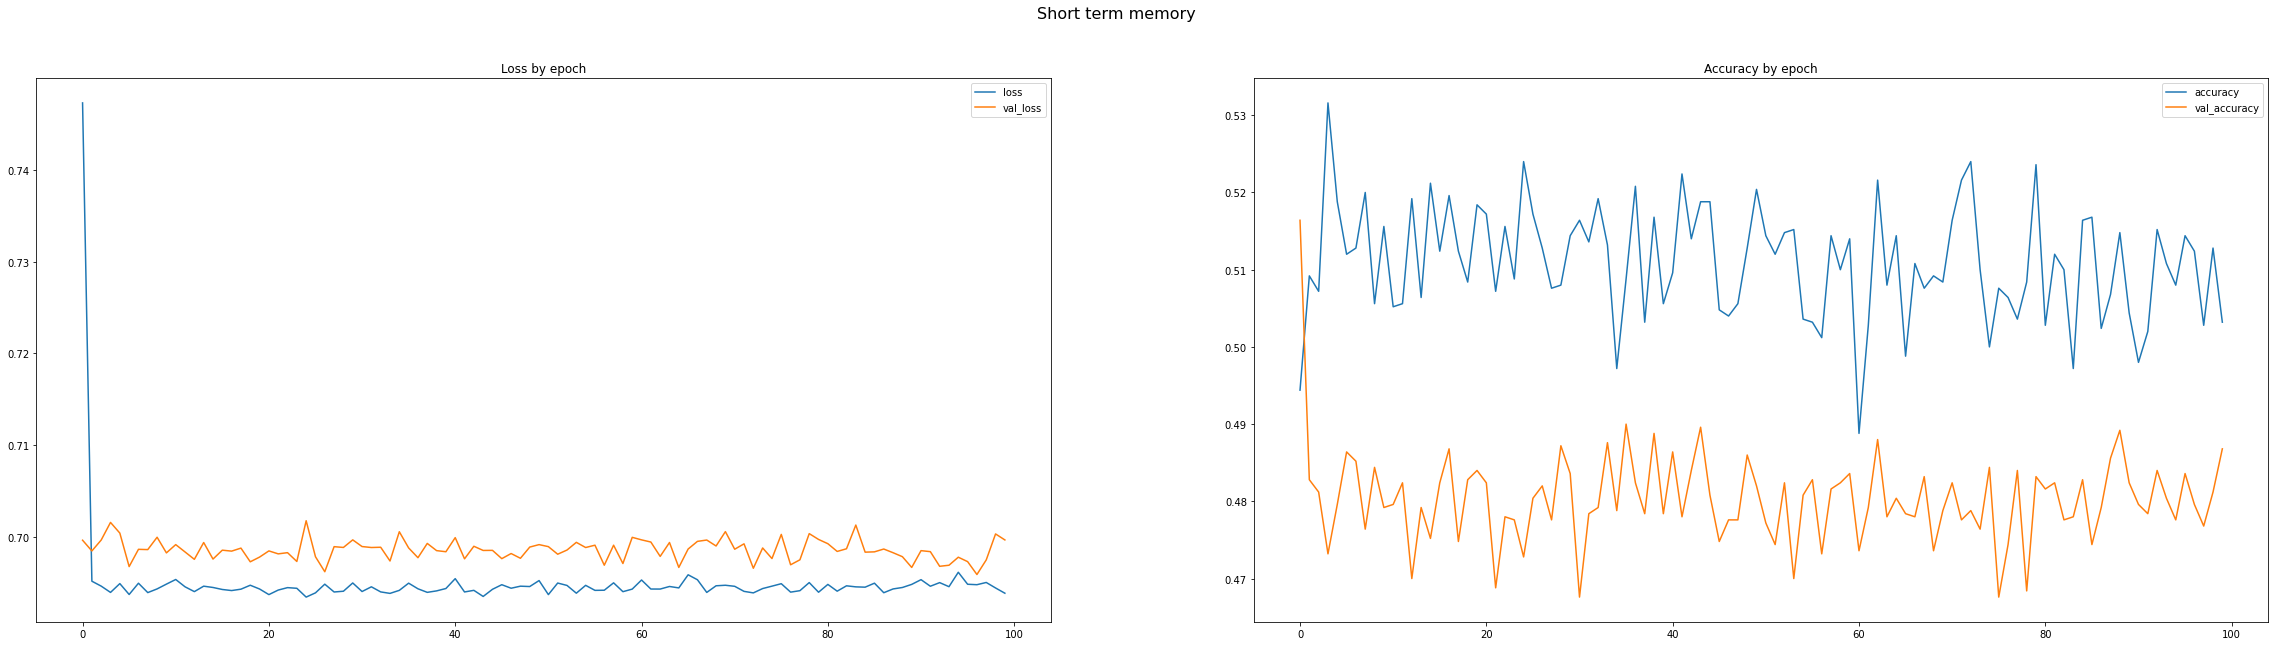

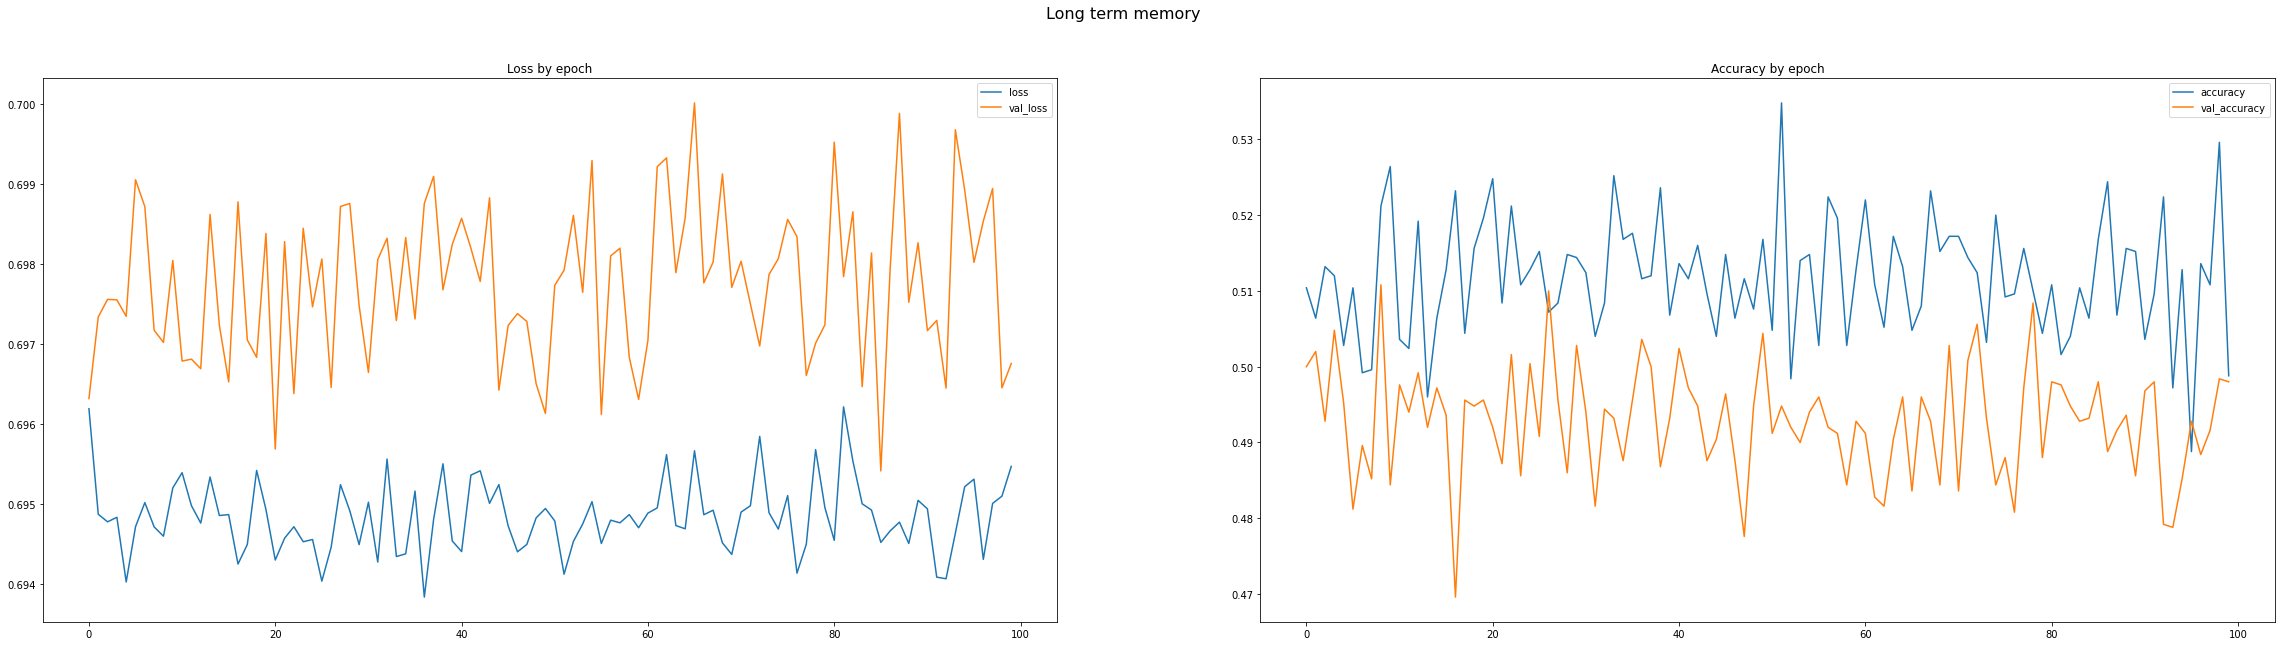

In [7]:
i = Input((T,))
x = Dense(1, activation='sigmoid')(i)

perform_modeling(i, x, X, Y_short_memory, Y_long_memory, 100, 0.01)

Short memory model
Epoch 1/200
79/79 [==============================] - 1s 7ms/step - loss: 0.7082 - accuracy: 0.4772 - val_loss: 0.6962 - val_accuracy: 0.4676
Epoch 2/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6864 - accuracy: 0.5436 - val_loss: 0.6928 - val_accuracy: 0.5244
Epoch 3/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6694 - accuracy: 0.6040 - val_loss: 0.6594 - val_accuracy: 0.6024
Epoch 4/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6153 - accuracy: 0.7144 - val_loss: 0.5660 - val_accuracy: 0.7696
Epoch 5/200
79/79 [==============================] - 0s 4ms/step - loss: 0.5004 - accuracy: 0.8208 - val_loss: 0.4378 - val_accuracy: 0.8648
Epoch 6/200
79/79 [==============================] - 0s 4ms/step - loss: 0.3872 - accuracy: 0.8776 - val_loss: 0.3467 - val_accuracy: 0.8776
Epoch 7/200
79/79 [==============================] - 0s 4ms/step - loss: 0.3110 - accuracy: 0.9040 - val_loss: 0.2878 - val_accuracy: 0

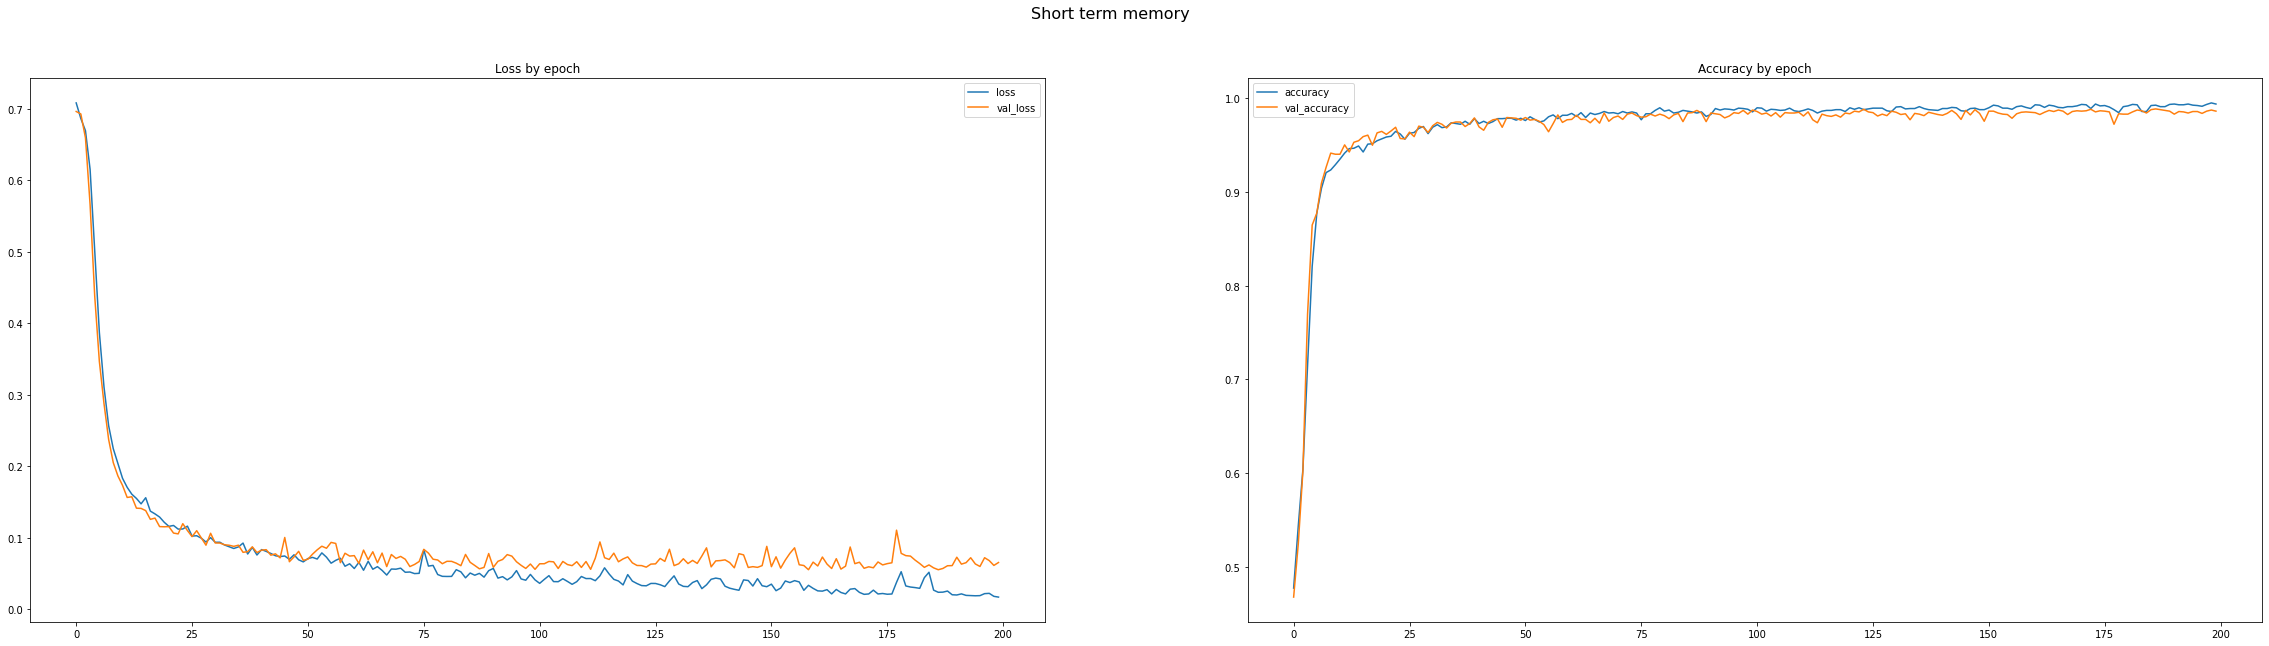

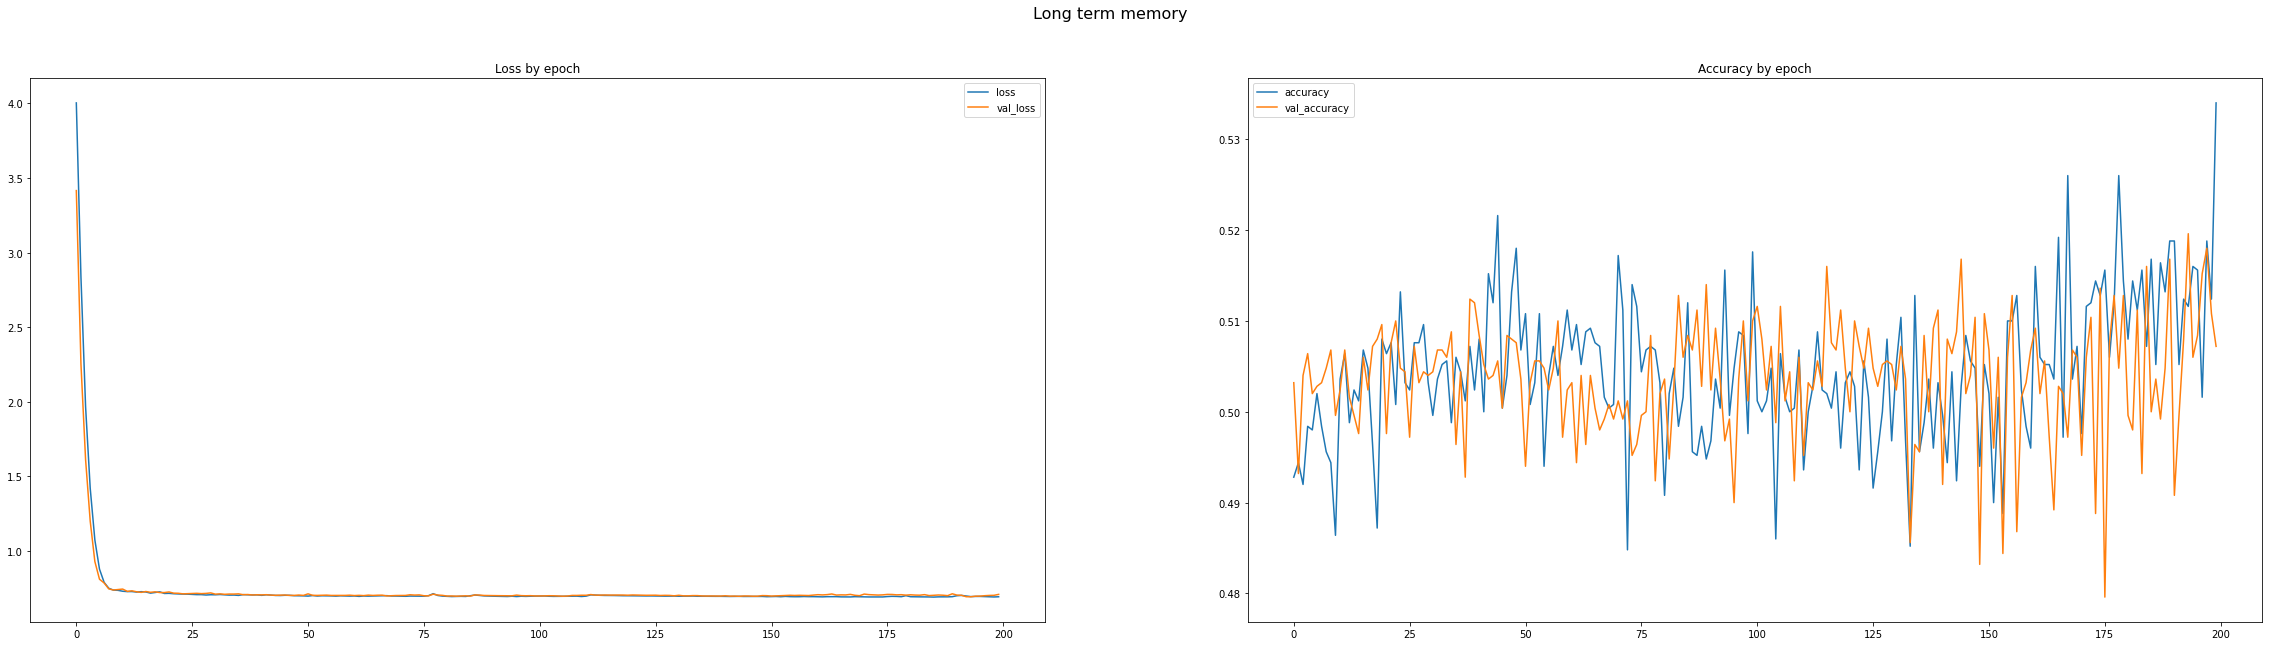

In [8]:
X2 = np.expand_dims(X, -1)

i = Input((T,1))
x = SimpleRNN(5)(i)
x = Dense(1, activation='sigmoid')(x)

perform_modeling(i, x, X2, Y_short_memory, Y_long_memory, 200, 0.01)

Short memory model
Epoch 1/200
79/79 [==============================] - 3s 13ms/step - loss: 0.6943 - accuracy: 0.5140 - val_loss: 0.6979 - val_accuracy: 0.4488
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5096 - val_loss: 0.6949 - val_accuracy: 0.4760
Epoch 3/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6916 - accuracy: 0.5060 - val_loss: 0.6942 - val_accuracy: 0.5200
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6890 - accuracy: 0.5596 - val_loss: 0.6926 - val_accuracy: 0.5128
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6704 - accuracy: 0.6352 - val_loss: 0.6406 - val_accuracy: 0.6868
Epoch 6/200
79/79 [==============================] - 1s 7ms/step - loss: 0.5578 - accuracy: 0.7452 - val_loss: 0.4454 - val_accuracy: 0.8392
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 0.3286 - accuracy: 0.9028 - val_loss: 0.2367 - val_accuracy: 

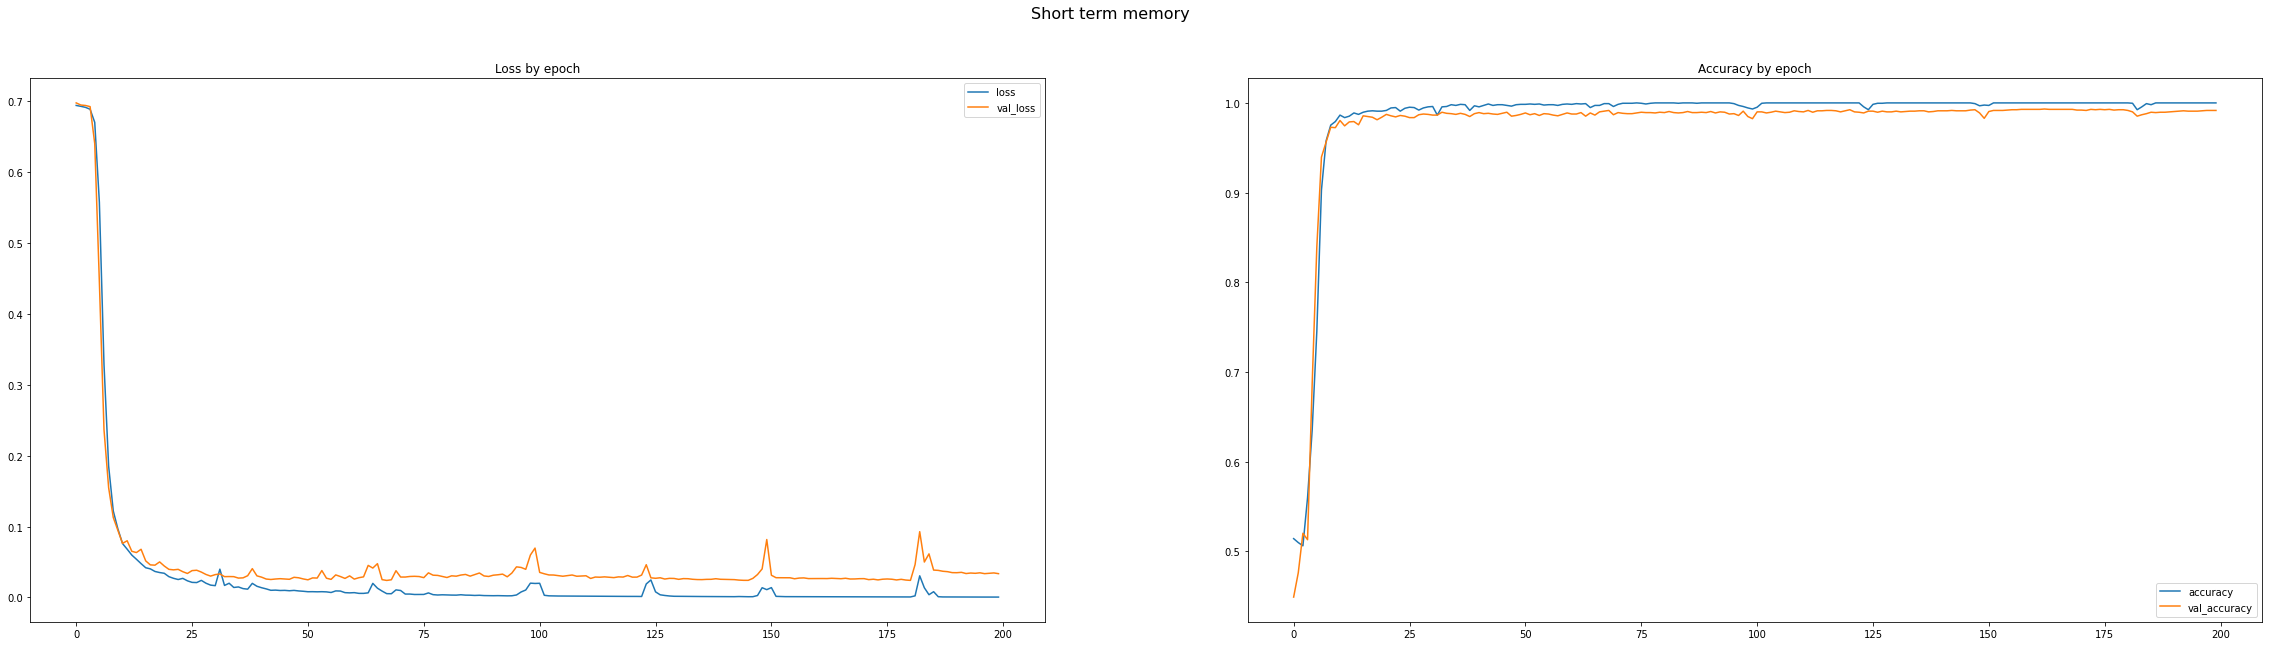

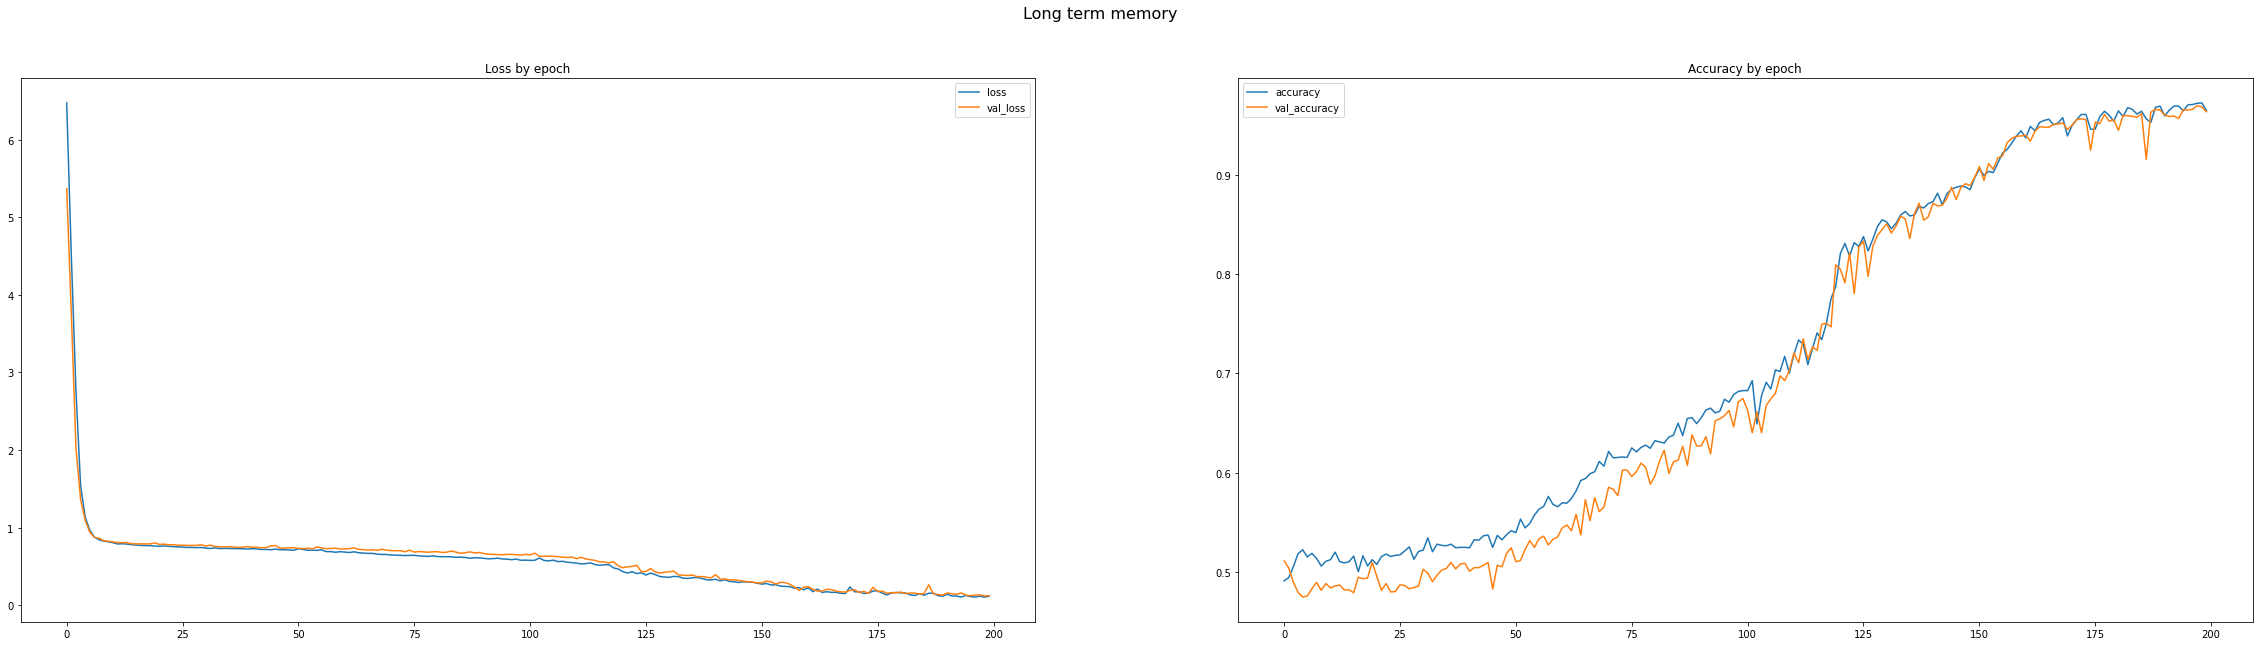

In [9]:
X2 = np.expand_dims(X, -1)

i = Input((T,1))
x = LSTM(5)(i)
x = Dense(1, activation='sigmoid')(x)

perform_modeling(i, x, X2, Y_short_memory, Y_long_memory, 200, 0.01)

Short memory model
Epoch 1/200
79/79 [==============================] - 3s 11ms/step - loss: 0.6950 - accuracy: 0.5008 - val_loss: 0.6941 - val_accuracy: 0.4508
Epoch 2/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6916 - accuracy: 0.4992 - val_loss: 0.6914 - val_accuracy: 0.4656
Epoch 3/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6687 - accuracy: 0.5468 - val_loss: 0.6359 - val_accuracy: 0.6384
Epoch 4/200
79/79 [==============================] - 1s 6ms/step - loss: 0.5811 - accuracy: 0.6932 - val_loss: 0.5230 - val_accuracy: 0.7552
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.4044 - accuracy: 0.8504 - val_loss: 0.3156 - val_accuracy: 0.8996
Epoch 6/200
79/79 [==============================] - 1s 6ms/step - loss: 0.2587 - accuracy: 0.9264 - val_loss: 0.2075 - val_accuracy: 0.9404
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 0.1816 - accuracy: 0.9472 - val_loss: 0.1657 - val_accuracy: 

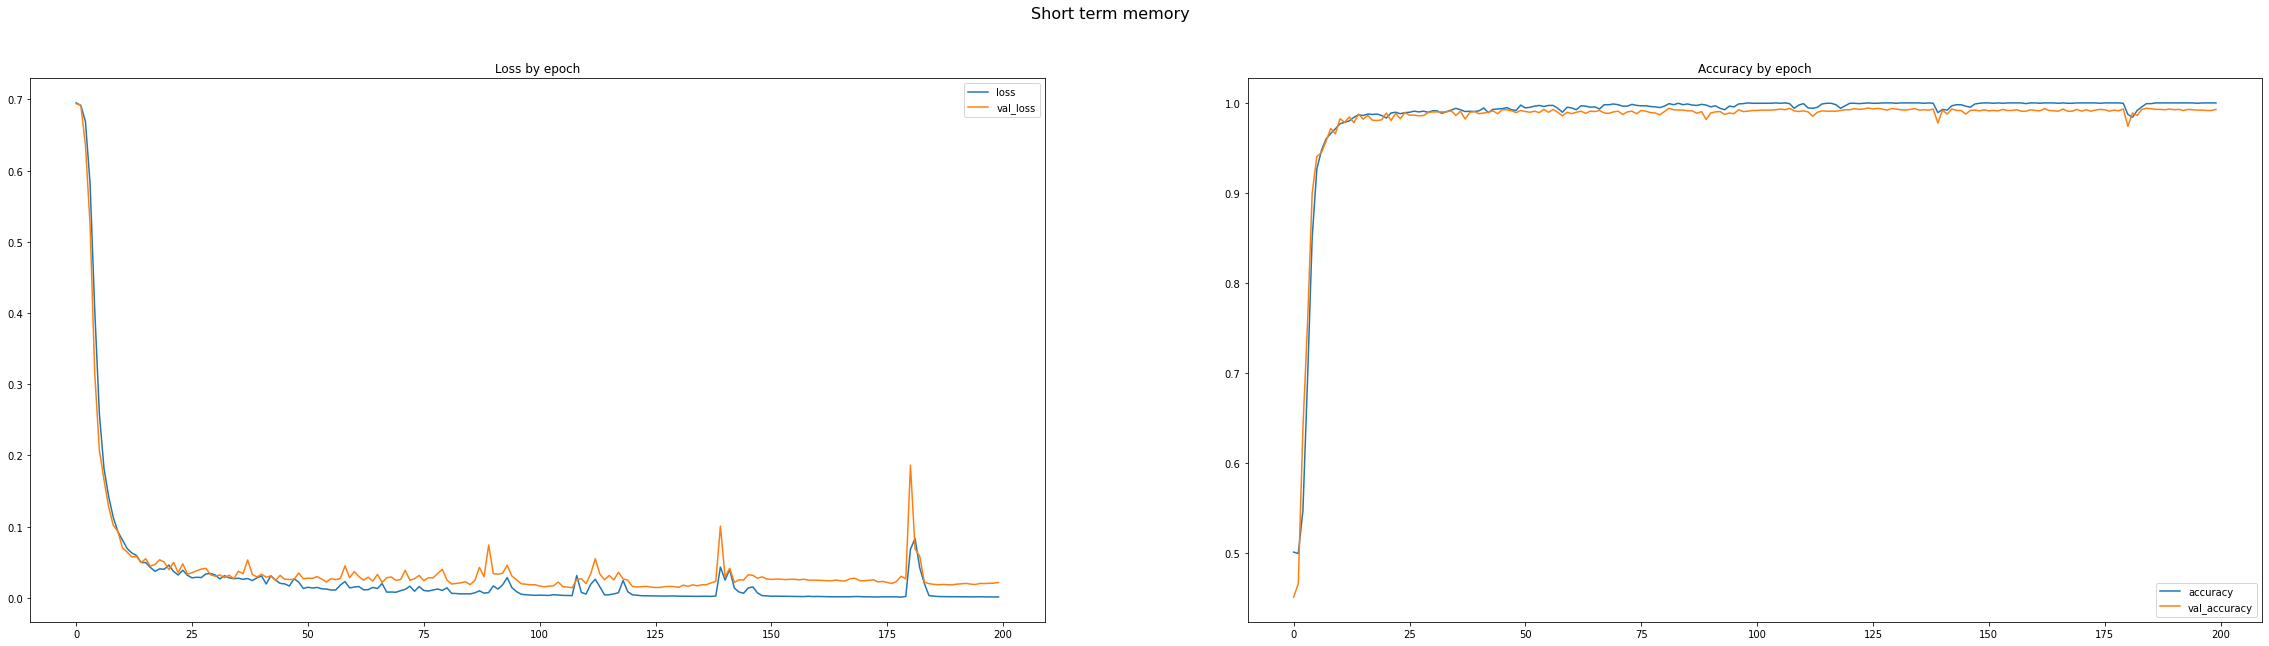

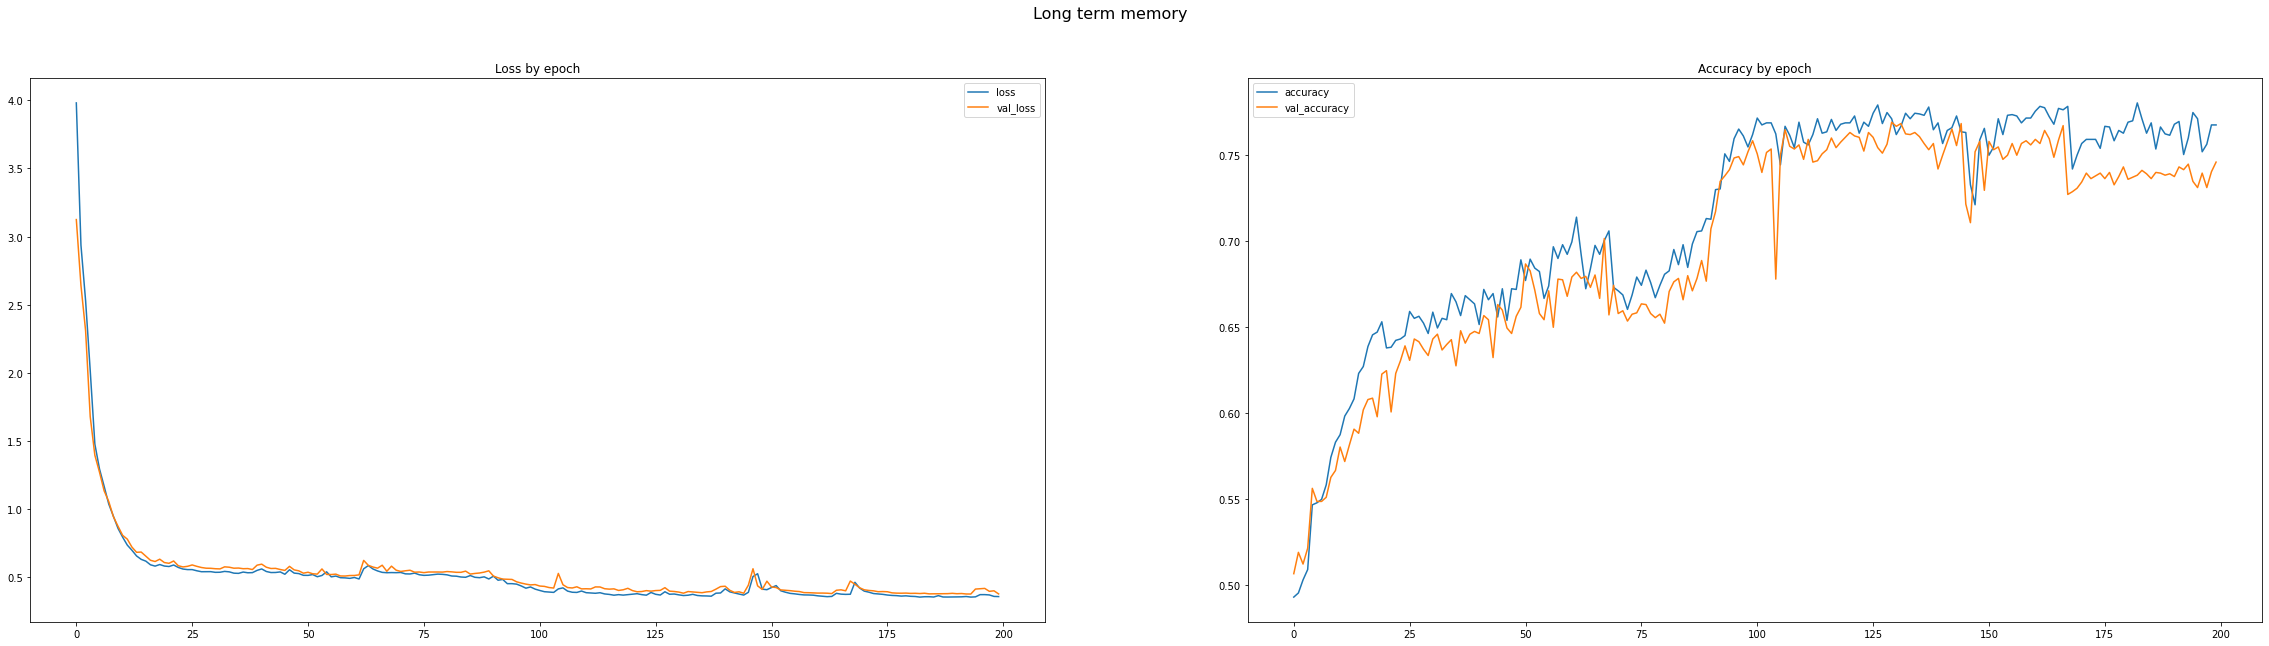

In [10]:
X2 = np.expand_dims(X, -1)

i = Input((T,1))
x = GRU(5)(i)
x = Dense(1, activation='sigmoid')(x)

perform_modeling(i, x, X2, Y_short_memory, Y_long_memory, 200, 0.01)

Short memory model
Epoch 1/200
79/79 [==============================] - 2s 11ms/step - loss: 0.6947 - accuracy: 0.5052 - val_loss: 0.6997 - val_accuracy: 0.4792
Epoch 2/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6926 - accuracy: 0.5176 - val_loss: 0.6964 - val_accuracy: 0.4788
Epoch 3/200
79/79 [==============================] - 1s 6ms/step - loss: 0.6919 - accuracy: 0.5244 - val_loss: 0.6986 - val_accuracy: 0.4792
Epoch 4/200
79/79 [==============================] - 1s 6ms/step - loss: 0.6913 - accuracy: 0.5220 - val_loss: 0.6985 - val_accuracy: 0.4792
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.5224 - val_loss: 0.6966 - val_accuracy: 0.4872
Epoch 6/200
79/79 [==============================] - 1s 6ms/step - loss: 0.6906 - accuracy: 0.5408 - val_loss: 0.6980 - val_accuracy: 0.4804
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6885 - accuracy: 0.5472 - val_loss: 0.6935 - val_accuracy: 

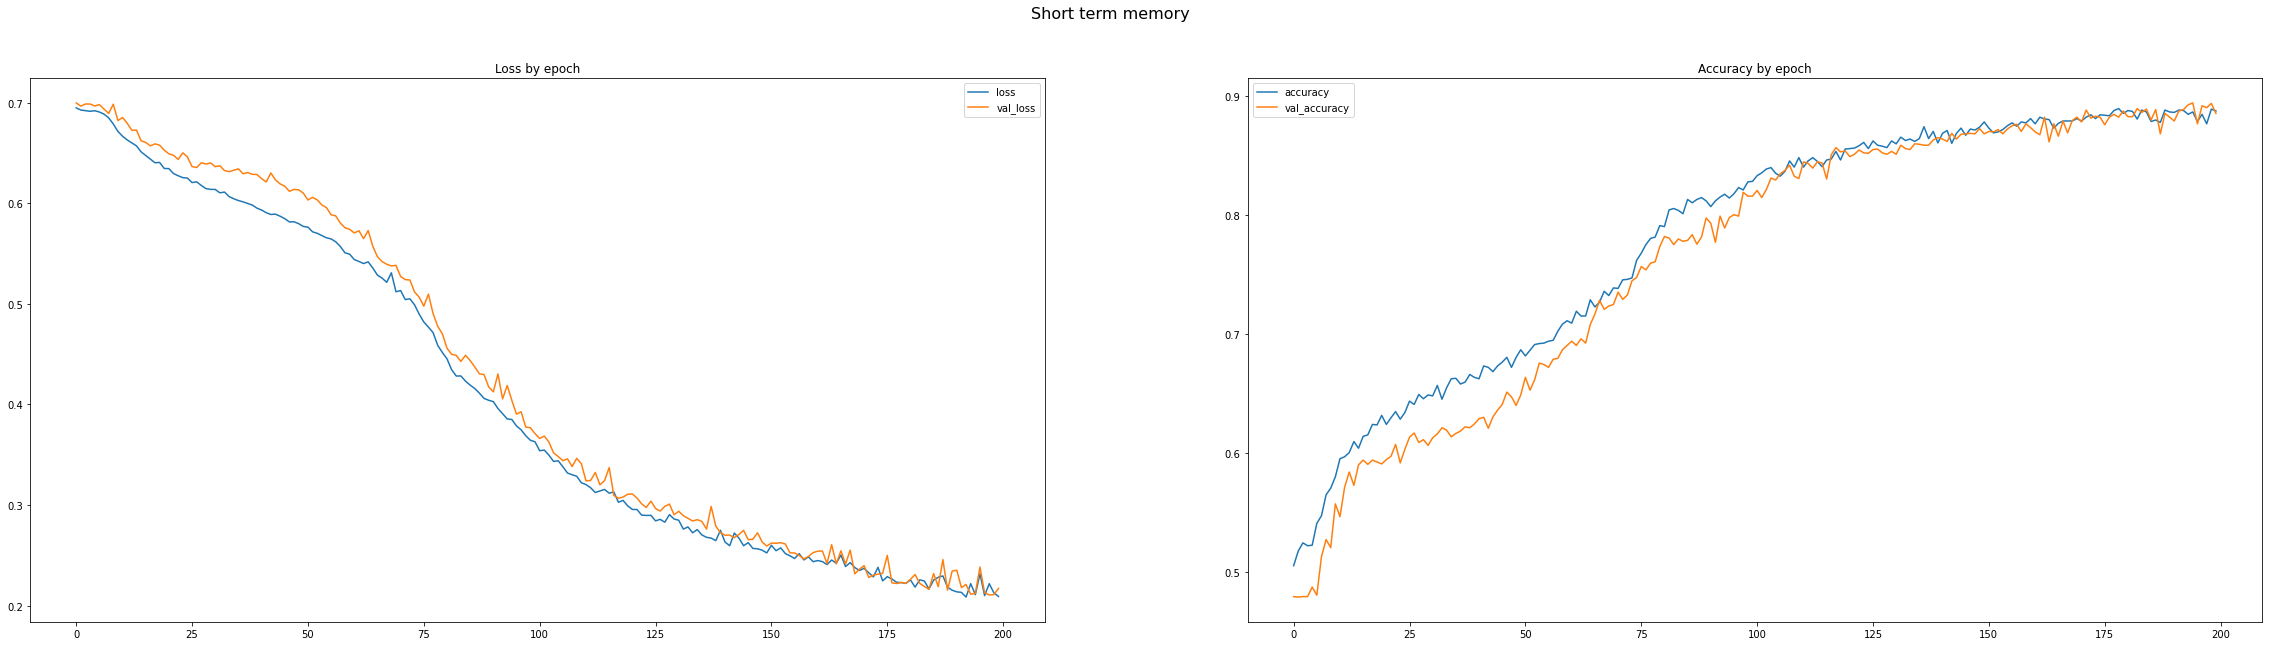

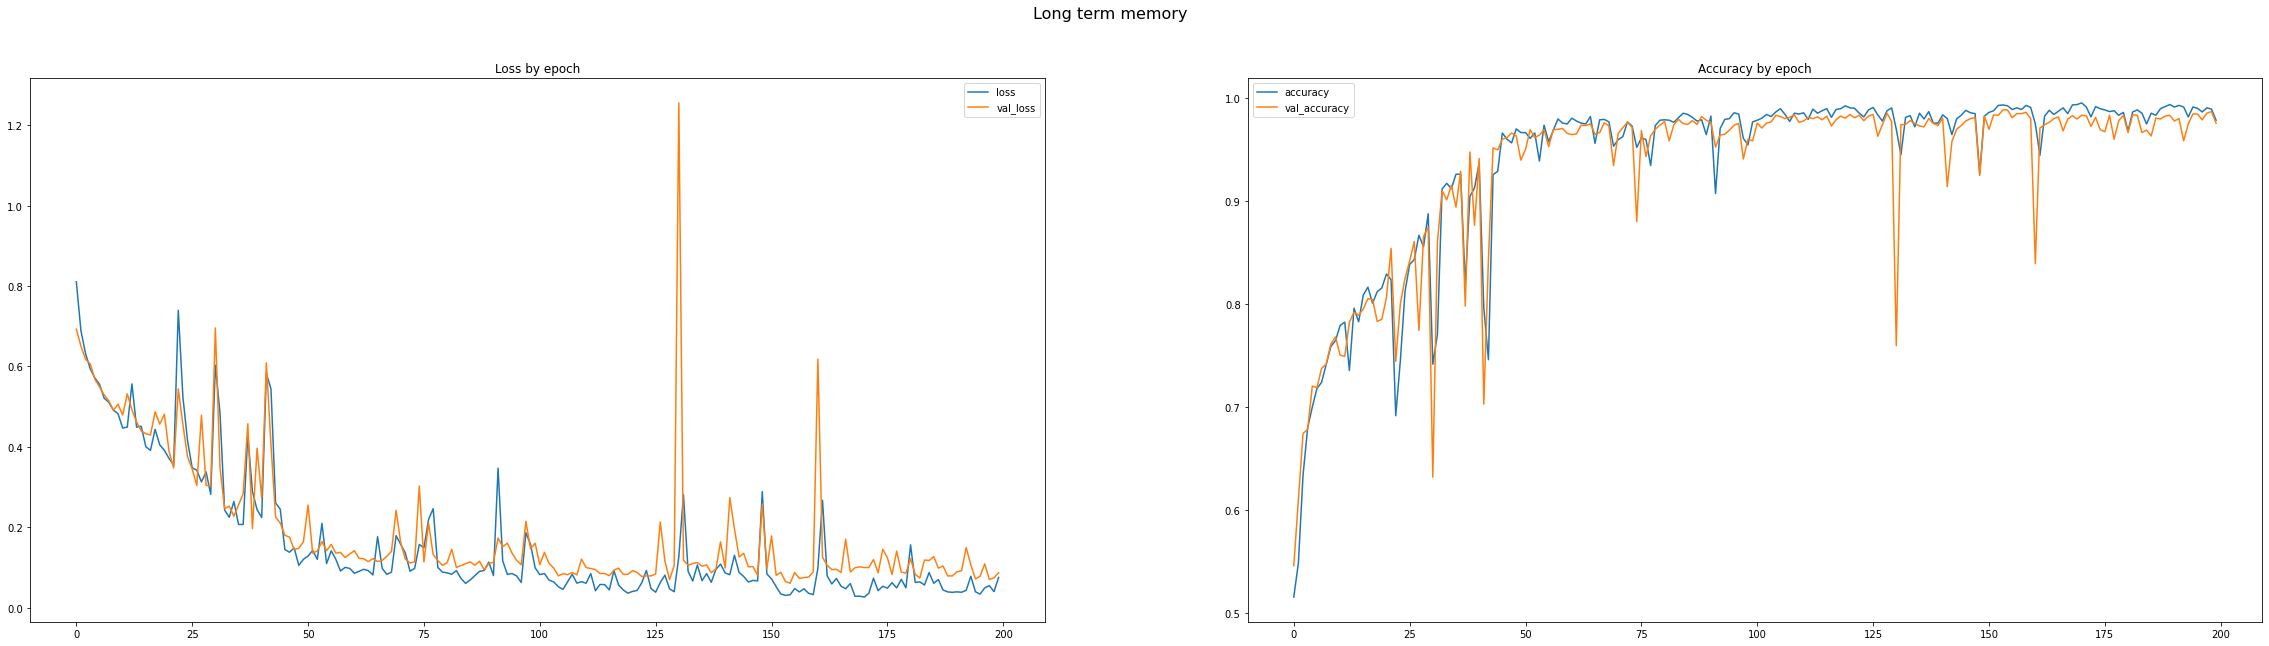

In [11]:
X2 = np.expand_dims(X, -1)

i = Input((T,1))
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)
x = Dense(1, activation='sigmoid')(x)

perform_modeling(i, x, X2, Y_short_memory, Y_long_memory, 200, 0.01)

In [12]:
# longer time series
# Start with a small T and increase it later
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)

X = np.array(X)
N = len(X)

Y_short_memory = generate_label(X, -1, -2, -3)
Y_long_memory = generate_label(X, 0, 1, 2)

Short memory model
Epoch 1/200
79/79 [==============================] - 3s 17ms/step - loss: 0.6951 - accuracy: 0.4940 - val_loss: 0.6936 - val_accuracy: 0.4712
Epoch 2/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6930 - accuracy: 0.4980 - val_loss: 0.6933 - val_accuracy: 0.5036
Epoch 3/200
79/79 [==============================] - 1s 13ms/step - loss: 0.6926 - accuracy: 0.5056 - val_loss: 0.6922 - val_accuracy: 0.5200
Epoch 4/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6821 - accuracy: 0.5308 - val_loss: 0.6695 - val_accuracy: 0.5656
Epoch 5/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6125 - accuracy: 0.6604 - val_loss: 0.5178 - val_accuracy: 0.7884
Epoch 6/200
79/79 [==============================] - 1s 12ms/step - loss: 0.4024 - accuracy: 0.8552 - val_loss: 0.3107 - val_accuracy: 0.9064
Epoch 7/200
79/79 [==============================] - 1s 11ms/step - loss: 0.2456 - accuracy: 0.9320 - val_loss: 0.1981 - val_accu

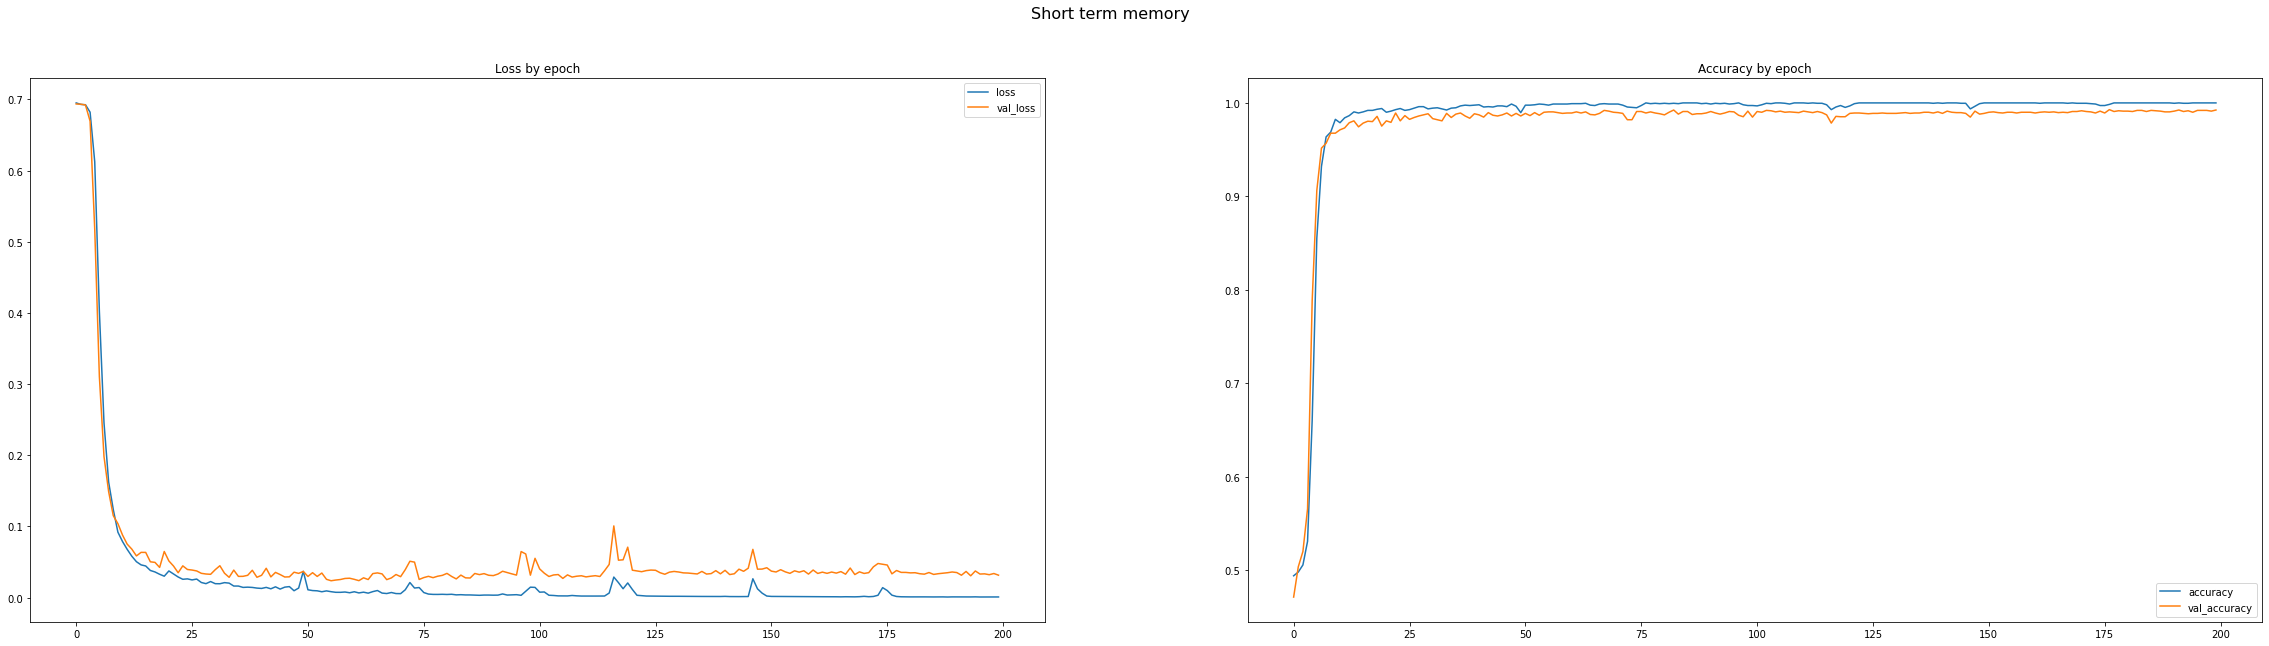

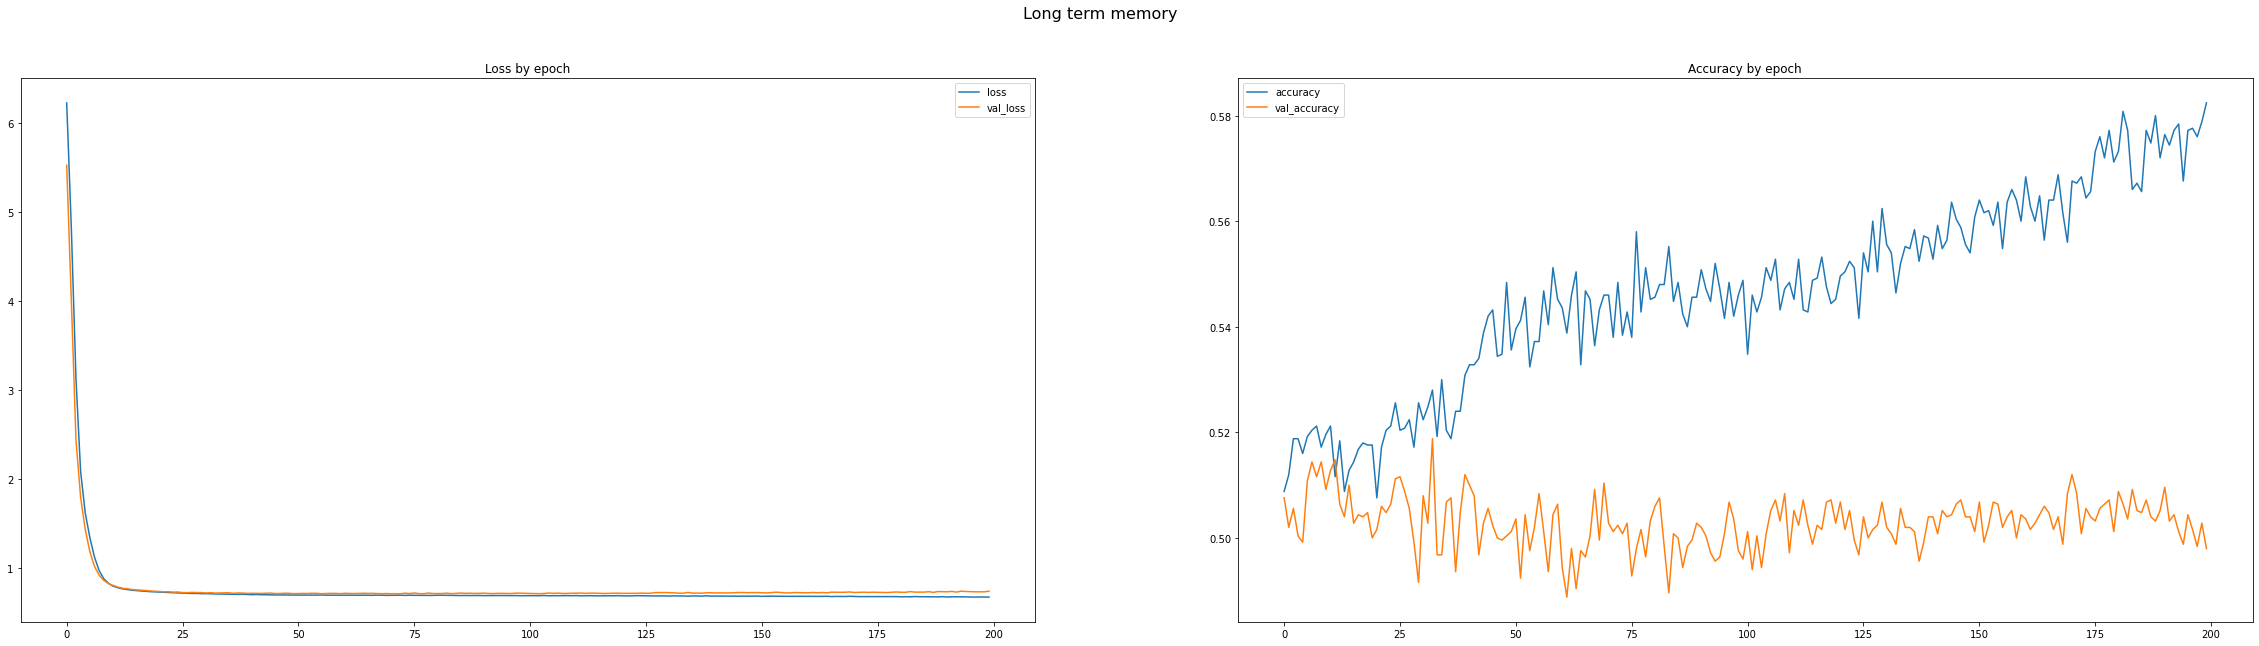

In [13]:
X2 = np.expand_dims(X, -1)

i = Input((T,1))
x = LSTM(5)(i)
x = Dense(1, activation='sigmoid')(x)

perform_modeling(i, x, X2, Y_short_memory, Y_long_memory, 200, 0.01)

Short memory model
Epoch 1/400
79/79 [==============================] - 3s 16ms/step - loss: 0.6945 - accuracy: 0.5012 - val_loss: 0.6929 - val_accuracy: 0.5072
Epoch 2/400
79/79 [==============================] - 1s 13ms/step - loss: 0.6936 - accuracy: 0.4996 - val_loss: 0.6930 - val_accuracy: 0.5056
Epoch 3/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6931 - accuracy: 0.5052 - val_loss: 0.6937 - val_accuracy: 0.5016
Epoch 4/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6937 - accuracy: 0.4876 - val_loss: 0.6930 - val_accuracy: 0.5100
Epoch 5/400
79/79 [==============================] - 1s 11ms/step - loss: 0.6930 - accuracy: 0.5052 - val_loss: 0.6931 - val_accuracy: 0.5056
Epoch 6/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6936 - accuracy: 0.4944 - val_loss: 0.6937 - val_accuracy: 0.5036
Epoch 7/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6929 - accuracy: 0.5160 - val_loss: 0.6932 - val_accu

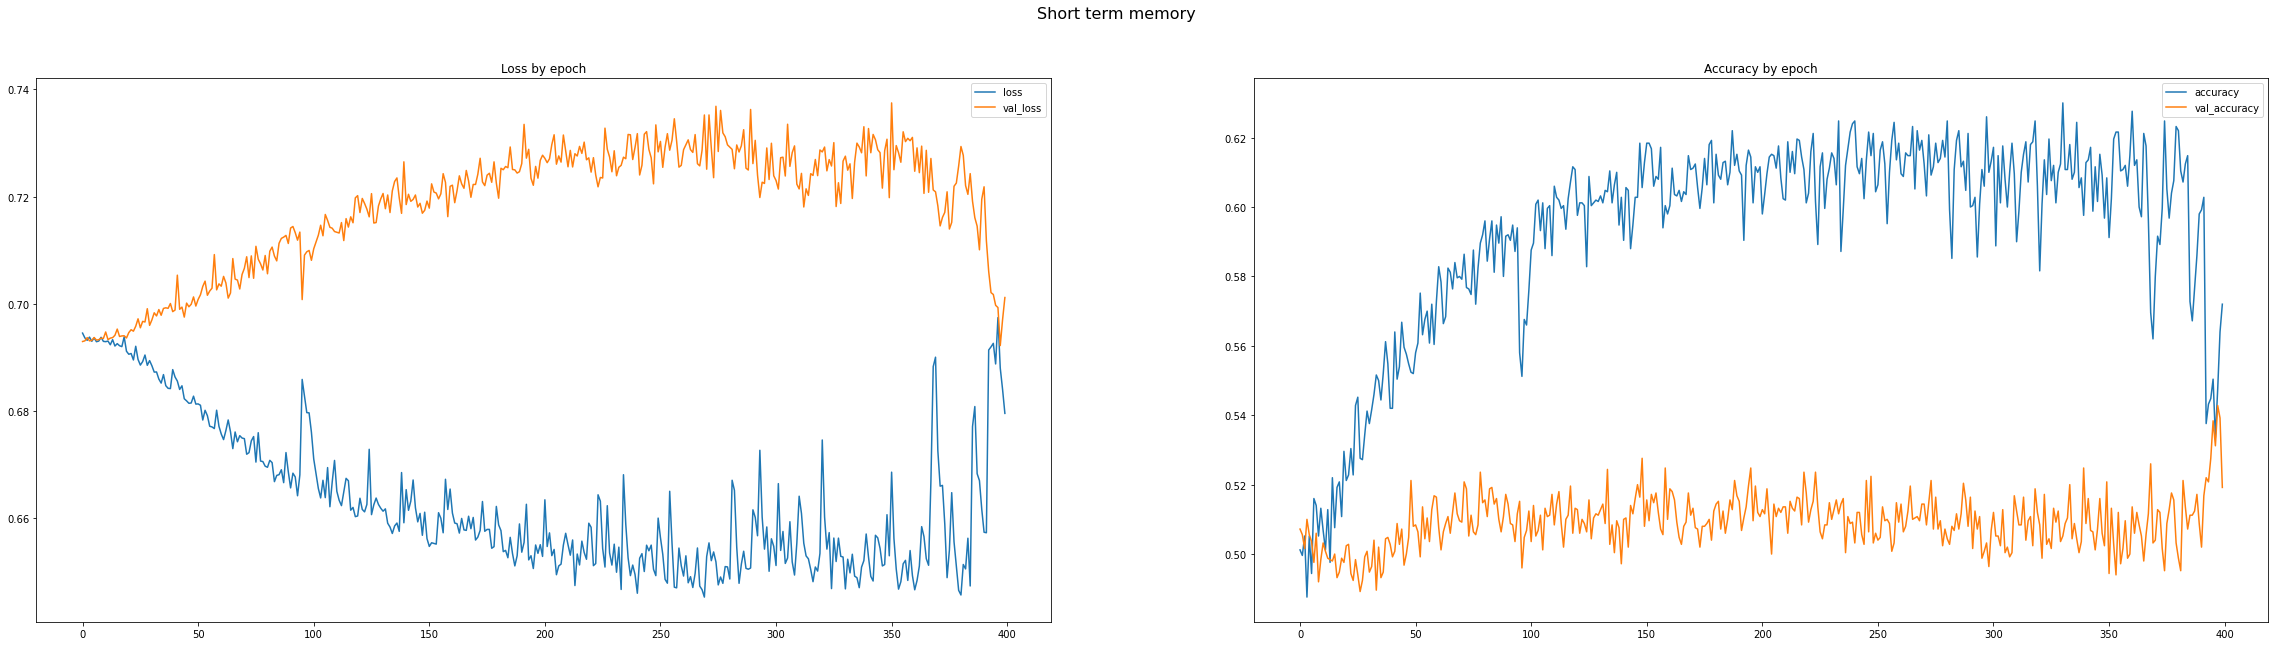

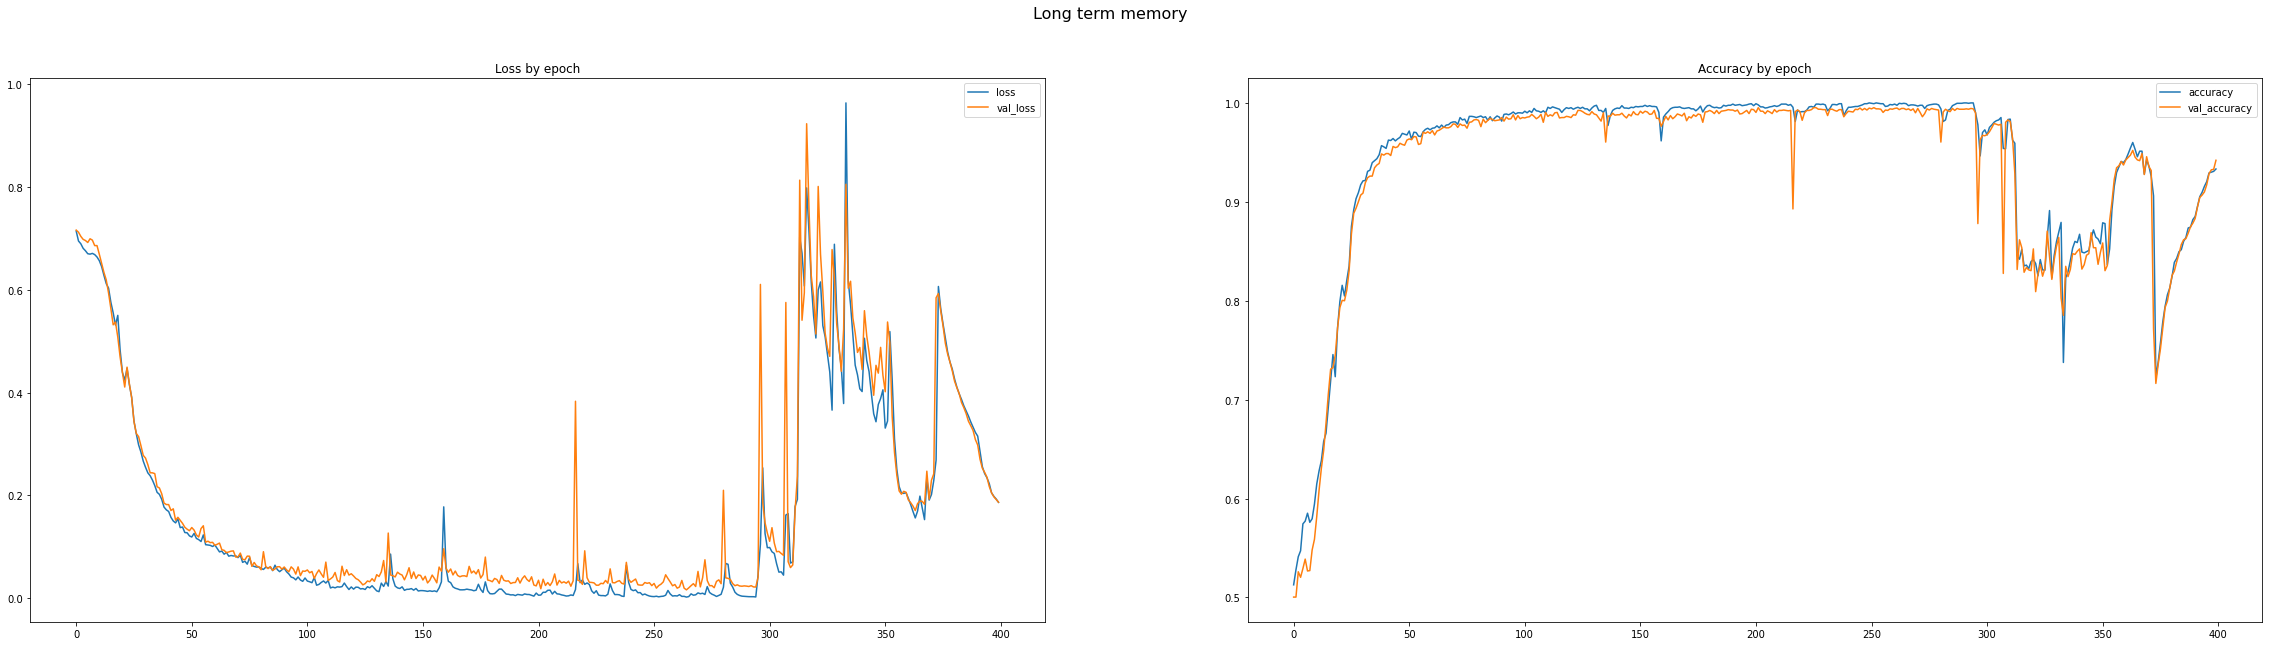

In [14]:
X2 = np.expand_dims(X, -1)

i = Input((T,1))
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)
x = Dense(1, activation='sigmoid')(x)

perform_modeling(i, x, X2, Y_short_memory, Y_long_memory, 400, 0.01)